In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
rng = np.random.default_rng()

In [ ]:
def initPop(pop_size, gens, freq):
  #set the freq to be aa
  aaCount = int(pop_size*freq)

  #inital population = 'pop'
  pop = np.zeros((pop_size,2))

  #put the freq into the inital pop
  for i in range(pop_size):
    if i < aaCount:
      pop[i] = [1,1]
    else:
      pop[i] = [0,0]

  #counters
  hom1 = 0
  hom0 = 0
  het = 0
  a = [1, 1]
  b = [0, 0]
  c = [0, 1]
  d = [1 ,0]
  #total = total amount
  total = 0
  #counts = orginal list of counters
  counts = []

  #puts the counters of the inital population 'pop' into counts
  for i in range(pop_size):
    if np.array_equal(pop[i], a):
      hom1+= 1
      total+= 1
    elif np.array_equal(pop[i], b):
      hom0+= 1
      total+= 1
    elif np.array_equal(pop[i], c):
      het+= 1
      total+= 1
    elif np.array_equal(pop[i], d):
      het+=1
      total+= 1
  counts.append([hom1, hom0, het, total, hom1/pop_size, hom0/pop_size, het/pop_size, (hom1/pop_size) + (het/2), (hom0/pop_size) + (het/2), ((hom1/pop_size)+(het/2))*((hom1/pop_size)+(het/2)), (2)*((hom0/pop_size)+(het/2))*((hom1/pop_size)+(het/2)), ((hom0/pop_size)+(het/2))*((hom0/pop_size)+(het/2))])

  #new counter list
  newCounts = []

  for i in range(1, gens + 1):

    newGen = []

    hom1 = 0
    hom0 = 0
    het = 0
    total= 0

    newCounts = []

    for j in range(pop_size):
      #create the new populations
      parent1 = pop[np.random.choice(pop_size, replace = False)]
      selector1 = np.random.choice(parent1, 1)[0]
      parent2 = pop[np.random.choice(pop_size, replace = False)]
      selector2 = np.random.choice(parent2, 1)[0]
      child = [selector1, selector2]
      newGen.append(child)

    for i in range(pop_size):
      #count the counters of the new populations
      if np.array_equal(newGen[i], a):
        hom1+= 1
        total+= 1
      elif np.array_equal(newGen[i], b):
        hom0+= 1
        total+= 1
      elif np.array_equal(newGen[i], c):
        het+=1
        total+= 1
      elif np.array_equal(newGen[i], d):
        het+=1
        total+= 1                                   # q = ((hom0/pop_size) + (het/2))      p =  ((hom1/pop_size) + (het/2))
    newCounts.append([hom1, hom0, het, total, hom1/pop_size, hom0/pop_size, het/pop_size, (hom1/pop_size) + (het/2), (hom0/pop_size) + (het/2), ((hom1/pop_size)+(het/2))*((hom1/pop_size)+(het/2)), (2)*((hom0/pop_size)+(het/2))*((hom1/pop_size)+(het/2)), ((hom0/pop_size)+(het/2))*((hom0/pop_size)+(het/2))])


    #put the counters together
    counts = np.vstack((counts, newCounts))
    pop = newGen

  #makes a dataframe with the combined counter lists
  df = pd.DataFrame(counts)
  df.columns = ["hom1", "hom0", "het", "total", "x", "y", "z", "true-p(A)-freq", "true-q(a)-freq", "HW-Expected-x", "HW-Expected-y", "HW-Expected-z"]
  return df

In [ ]:
df = initPop(3000,40,0.2)
df



,hom1,hom0,het,total,x,y,z,true-p(A)-freq,true-q(a)-freq,HW-Expected-x,HW-Expected-y,HW-Expected-z
0,600.0,2400.0,0.0,3000.0,0.200000,0.800000,0.000000,0.200000,0.800000,0.040000,0.320000,0.640000
1,114.0,1925.0,961.0,3000.0,0.038000,0.641667,0.320333,480.538000,481.141667,230916.769444,462413.708433,231497.303403
2,112.0,1978.0,910.0,3000.0,0.037333,0.659333,0.303333,455.037333,455.659333,207058.974727,414684.015897,207625.428054
3,105.0,1998.0,897.0,3000.0,0.035000,0.666000,0.299000,448.535000,449.166000,201183.646225,402933.343620,201750.095556
4,100.0,2006.0,894.0,3000.0,0.033333,0.668667,0.298000,447.033333,447.668667,199838.801111,400245.632578,200407.235115
5,92.0,2040.0,868.0,3000.0,0.030667,0.680000,0.289333,434.030667,434.680000,188382.619607,377328.900373,188946.702400
6,99.0,2021.0,880.0,3000.0,0.033000,0.673667,0.293333,440.033000,440.673667,193629.041089,387821.911129,194193.280493
7,93.0,2023.0,884.0,3000.0,0.031000,0.674333,0.294667,442.031000,442.674333,195391.404961,391351.556475,195960.565392
8,107.0,2047.0,846.0,3000.0,0.035667,0.682333,0.282000,423.035667,423.682333,178959.175272,358465.476673,179506.719579
9,78.0,2053.0,869.0,3000.0,0.026000,0.684333,0.289667,434.526000,435.184333,188812.844676,378197.815252,189385.403979


<Axes: xlabel='None', ylabel='x'>

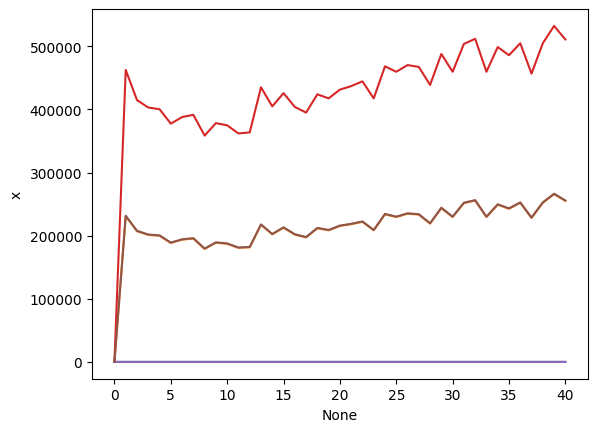

In [ ]:
sns.lineplot(x=df.index, y=df["x"])
sns.lineplot(x=df.index, y=df["HW-Expected-x"])

sns.lineplot(x=df.index, y=df["y"])
sns.lineplot(x=df.index, y=df["HW-Expected-y"])

sns.lineplot(x=df.index, y=df["z"])
sns.lineplot(x=df.index, y=df["HW-Expected-z"])